# Generating Top 10 Plot

The aim of this file is to produce the plots that show the TOP 10 scores for one or multiple experiments that were performed. For each experiment, we need to specify the buffer file as well as a user defined tag. The tag helps to easily differentiate between differnet experiments.

## Setup

### Change Working Directory

In [1]:
# Change working directory to the parent of the parent of the script

import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent of the parent directory
parent_parent_directory = os.path.abspath(os.path.join(current_directory, '..', '..'))

# Change the working directory to the parent of the parent directory
os.chdir(parent_parent_directory)

# Verify the change by printing the new working directory
print("New working directory:", os.getcwd())


New working directory: /vol/project/2023/70079/g237007905/bo_molecules


### Imports

In [2]:
# Standard library imports
import random
from typing import List


# Third-party imports
import gpytorch
import torch
import json
from tdc import Oracle
from gauche.kernels.graph_kernels import WeisfeilerLehmanKernel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from gauche import SIGP, NonTensorialInputs

from botorch.fit import fit_gpytorch_mll, fit_gpytorch_mll
from botorch.settings import debug
from botorch.exceptions.errors import ModelFittingError

/vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Module Imports
from modules.benchmarking.metrics_and_benchmarking import accumulate_top_n
from modules.utils.read_sample_store import read_compressed_or_regular_json, buffer_to_dataframe

[04/26/24 21:05:23] WARNING  To use the Graphein submodule                                         ]8;id=109643;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/features/sequence/embeddings.py\embeddings.py]8;;\:]8;id=901251;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/features/sequence/embeddings.py#45\45]8;;\
                             graphein.protein.features.sequence.embeddings, you need to install:                   
                             biovec                                                                                
                             To do so, use the following command: pip install biovec                               
                             Alternatively, you can install graphein with the extras:                              
                                                                                                                   
                             pip install graphein[extras]                                                          

[04/26/24 21:05:24] WARNING  To use the Graphein submodule graphein.protein.visualisation, you  ]8;id=812440;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/visualisation.py\visualisation.py]8;;\:]8;id=518578;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/visualisation.py#36\36]8;;\
                             need to install: pytorch3d                                                            
                             pytorch3d cannot be installed via pip                                                 

                    WARNING  To use the Graphein submodule graphein.protein.meshes, you need to        ]8;id=391757;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/meshes.py\meshes.py]8;;\:]8;id=62986;file:///vol/project/2023/70079/g237007905/bo_molecules/venv/lib/python3.10/site-packages/graphein/protein/meshes.py#30\30]8;;\
                             install: pytorch3d                                                                    
                             To do so, use the following command: pip install pytorch3d                            

### Configurations

In [4]:
oracle_name = "zaleplon_mpo"

# Configurations for the plots
x_min = 0
x_max = 3000
y_min = 0
y_max = 1.1

title = f"Best Observed Top 10 values for {oracle_name}"


# Results directory
results_dir = f"experiments/results/{oracle_name}/"

# The name and buffer file path for each experiment
buffer_file_path_dict = {
    "Run 1": "2024-04-22_20-31-20_zaleplon_mpo_3000",
    "Run 2": "2024-04-22_20-31-51_zaleplon_mpo_3000",
}

### Utility Functions

In [5]:
def prepare_plotting_data(buffer_file_path: str) -> List[float]:
    """
    Load the buffer and prepare data for the top 10 plot.

    Args:
        buffer_file_path: Path to the buffer file for the experiment.

    Returns:
        List[float]: Data for the top 10 plot.
    """
    # Load the buffer file
    buffer = read_compressed_or_regular_json(buffer_file_path)

    # Convert the buffer to a DataFrame
    buffer_df = buffer_to_dataframe(buffer)

    # Calculate top 10 values
    data = accumulate_top_n(buffer_df['oracle_score'], 10)

    return data

### Generate Top 10 Plots

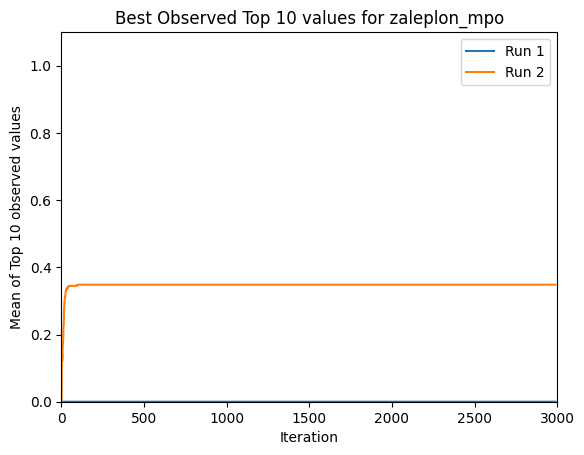

In [6]:
# Iteratively plot curves for each experiment
for name, buffer_file_path in buffer_file_path_dict.items():
    file_path = f"{results_dir}{buffer_file_path}/buffer.json.gz"
    data = prepare_plotting_data(file_path)
    plt.plot(data, label=name)
    
plt.xlabel("Iteration")
plt.ylabel("Mean of Top 10 observed values")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title(title)
plt.legend()

plt.show()
plt.close()